In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

d = pd.read_csv('/share/ju/matt/street-flooding/notebooks/for_paper/analysis_df_describe_SMOOTHING_AND_COVARIATES_12222024.csv')

In [30]:
d.columns

Index(['Unnamed: 0', 'n_total', 'n_classified_positive', 'n_tp', 'n_fp',
       'n_tn', 'n_fn', 'total_not_annotated', 'positives_not_annotated',
       'negatives_not_annotated', 'empirical_estimate_ct', 'p_y',
       'p_y_CI_lower', 'p_y_CI_upper', 'at_least_one_positive_image_by_area',
       'at_least_one_positive_image_by_area_CI_lower',
       'at_least_one_positive_image_by_area_CI_upper', 'empirical_estimate',
       'at_least_one_positive_image_by_area_if_you_have_100_images',
       'at_least_one_positive_image_by_area_if_you_have_100_images_CI_lower',
       'at_least_one_positive_image_by_area_if_you_have_100_images_CI_upper',
       'n_images_by_area', 'total_population', 'nhl_white_alone',
       'nhl_black_alone', 'hispanic_alone', 'nhl_asian_alone',
       'total_households', 'num_households_with_internet',
       'num_households_with_smartphone', 'median_household_income',
       'num_high_school_graduates', 'num_bachelors_degree',
       'num_graduate_degree', 'num_li

# basic exploratory analysis

In [31]:
pd.set_option('display.max_columns', 500)
ESTIMATE_THRES = 0.5
d['confirmed_flooded_image'] = d['at_least_one_positive_image_by_area_if_you_have_100_images'] == 1
d['p_y_percentile'] = d['p_y'].rank(pct=True) * 100
#thres = d[d['confirmed_flooded_image']]['p_y'].quantile(0.25)
#print(thres)

d['above_thres'] = d['at_least_one_positive_image_by_area_if_you_have_100_images'] > ESTIMATE_THRES
# fractoin of tracts above above_Thres 
print(d[d['above_thres']].shape[0] / d.shape[0])

d['white_frac'] = d['nhl_white_alone'] / d['total_population'] 
d['black_frac'] = d['nhl_black_alone'] / d['total_population']
d['hispanic_frac'] = d['hispanic_alone'] / d['total_population']
d['asian_frac'] = d['nhl_asian_alone'] / d['total_population']

d.head()


0.25


,Unnamed: 0,n_total,n_classified_positive,n_tp,n_fp,n_tn,n_fn,total_not_annotated,positives_not_annotated,negatives_not_annotated,empirical_estimate_ct,p_y,p_y_CI_lower,p_y_CI_upper,at_least_one_positive_image_by_area,at_least_one_positive_image_by_area_CI_lower,at_least_one_positive_image_by_area_CI_upper,empirical_estimate,at_least_one_positive_image_by_area_if_you_have_100_images,at_least_one_positive_image_by_area_if_you_have_100_images_CI_lower,at_least_one_positive_image_by_area_if_you_have_100_images_CI_upper,n_images_by_area,total_population,nhl_white_alone,nhl_black_alone,hispanic_alone,nhl_asian_alone,total_households,num_households_with_internet,num_households_with_smartphone,median_household_income,num_high_school_graduates,num_bachelors_degree,num_graduate_degree,num_limited_english_speaking_households,ft_elevation_min,ft_elevation_max,ft_elevation_mean,area,n_floodnet_sensors,dep_moderate_1_area,dep_moderate_2_area,dep_moderate_1_frac,dep_moderate_2_frac,sewer_backup_311c,street_flooding_311c,catch_basin_clogged/flooding_311c,manhole_overflow_311c,highway_flooding_311c,confirmed_flooded_image,p_y_percentile,above_thres,white_frac,black_frac,hispanic_frac,asian_frac
0,count,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2381.00000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2381.00000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2.389000e+03,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2.389000e+03,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,False,100.0,True,1.000000,1.000000,1.000000,1.000000
1,mean,398.416911,0.632064,0.141063,0.074927,0.212223,0.001256,397.987442,0.416074,397.783591,0.00160,0.006288,0.000885,0.025533,0.323802,0.088405,0.861696,0.00160,0.223481,0.079340,0.697108,398.416911,3710.407283,1153.428631,778.670155,1075.611134,536.120134,1409.954374,1234.532022,1241.151528,-3.508053e+07,617.987024,610.806195,445.406028,195.916702,29.843031,75.616995,51.239119,5.576778e+06,0.036417,34311.464798,17695.695535,0.009465,0.004954,0.469653,0.282964,0.191293,0.015906,0.000419,False,62.5,False,0.310863,0.209861,0.289890,0.144491
2,std,742.107516,2.631912,0.770439,0.446271,0.637797,0.035422,741.067253,1.797591,740.432775,0.00733,0.024620,0.008239,0.061881,0.258343,0.262561,0.174111,0.00733,0.249153,0.260465,0.224889,742.107516,2055.712096,1376.956074,1055.827339,1261.733082,727.082248,918.577634,829.028988,830.513333,1.490619e+08,414.947833,553.028163,553.503935,232.432631,31.073804,51.091833,39.646838,3.428577e+07,0.271351,80757.194694,51391.470631,0.016441,0.014013,1.351383,1.162060,0.545876,0.131662,0.020459,False,75.0,False,0.669820,0.513607,0.613769,0.353689
3,min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000206,0.000000,0.001165,0.000000,0.000000,0.000000,0.00000,0.019180,0.000000,0.110067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.666667e+08,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000008,4.206009e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,12.5,False,NaN,NaN,NaN,NaN
4,25%,124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000,0.000000,124.000000,0.00000,0.001188,0.000009,0.007476,0.143673,0.001384,0.783831,0.00000,0.091734,0.000868,0.528237,124.000000,2307.000000,107.000000,41.000000,277.000000,66.000000,774.000000,672.000000,662.000000,5.371600e+04,319.000000,262.000000,126.000000,39.000000,6.000000,39.000000,22.195621,1.652214e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,25.0,False,0.046381,0.017772,0.120069,0.028609


In [32]:
print(d['total_population'].isna().sum())

0


In [33]:
d[['dep_moderate_1_area', 'dep_moderate_2_area']].describe()

,dep_moderate_1_area,dep_moderate_2_area
count,8.000000,8.000000
mean,143949.094885,102267.398051
std,344909.457260,257048.475768
min,0.000000,0.000000
25%,1791.750000,0.000000
50%,19669.665045,6038.350533
75%,45922.897272,26119.639309
max,994795.769502,736975.317178


In [34]:
d['no_dep_flooding'] = (d['dep_moderate_1_area'] == 0) & (d['dep_moderate_2_area'] == 0)
for percentile in [80, 90, 95]:
    print("Fraction of locations at percentile %i or higher of p_y with no DEP predicted flooding: %2.3f" % (percentile, 1 - d.loc[d['p_y_percentile'] >= percentile, 'no_dep_flooding'].mean()))
    print("Population in these locations: %2.3f" % d.loc[(d['p_y_percentile'] >= percentile) & (d['no_dep_flooding'] == 0), 'total_population'].sum())
print("fraction of locations with confirmed positive image with no DEP predicted flooding: %2.3f" % (1 - d.loc[d['confirmed_flooded_image'], 'no_dep_flooding'].mean()))
print("Population in these locations: %2.3f" % d.loc[(d['confirmed_flooded_image'] == 1) & (d['no_dep_flooding'] == 0), 'total_population'].sum())
print("fraction of locations above 25th thres p_y among flooded images with no DEP predicted flooding: %2.3f" % (1 - d.loc[d['above_thres'], 'no_dep_flooding'].mean()))
print("Population in these locations: %2.3f" % d.loc[(d['above_thres'] == 1) & (d['no_dep_flooding'] == 0), 'total_population'].sum())

Fraction of locations at percentile 80 or higher of p_y with no DEP predicted flooding: 1.000
Population in these locations: 18334.000
Fraction of locations at percentile 90 or higher of p_y with no DEP predicted flooding: 1.000
Population in these locations: 2389.000
Fraction of locations at percentile 95 or higher of p_y with no DEP predicted flooding: 1.000
Population in these locations: 2389.000
fraction of locations with confirmed positive image with no DEP predicted flooding: 1.000
Population in these locations: 15945.000
fraction of locations above 25th thres p_y among flooded images with no DEP predicted flooding: 1.000
Population in these locations: 18334.000


In [35]:
d[['p_y', 'empirical_estimate_ct', 'at_least_one_positive_image_by_area']].corr(method='spearman')

,p_y,empirical_estimate_ct,at_least_one_positive_image_by_area
p_y,1.000000,0.938591,0.904762
empirical_estimate_ct,0.938591,1.000000,0.761019
at_least_one_positive_image_by_area,0.904762,0.761019,1.000000


In [36]:
d[['p_y', 'empirical_estimate_ct', 'at_least_one_positive_image_by_area']].corr(method='pearson')

,p_y,empirical_estimate_ct,at_least_one_positive_image_by_area
p_y,1.0,1.0,1.0
empirical_estimate_ct,1.0,1.0,1.0
at_least_one_positive_image_by_area,1.0,1.0,1.0


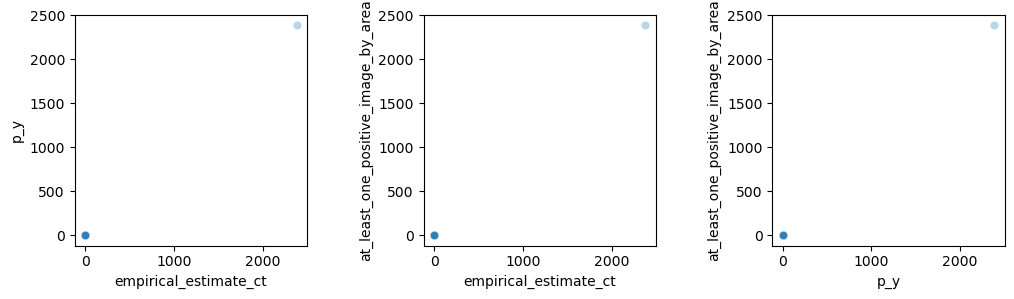

In [37]:
# pairplot of these three using seaborn
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
sns.scatterplot(data=d, x='empirical_estimate_ct', y='p_y', alpha=0.3)
plt.subplot(1, 3, 2)
sns.scatterplot(data=d, x='empirical_estimate_ct', y='at_least_one_positive_image_by_area', alpha=0.3)
plt.subplot(1, 3, 3)
sns.scatterplot(data=d, x='p_y', y='at_least_one_positive_image_by_area', alpha=0.3)
plt.subplots_adjust(wspace=0.5)



# 311

### sanity check: all correlations are positive. 

         Current function value: 0.000605
         Iterations: 35
         Current function value: 0.000000
         Iterations: 35


/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warni

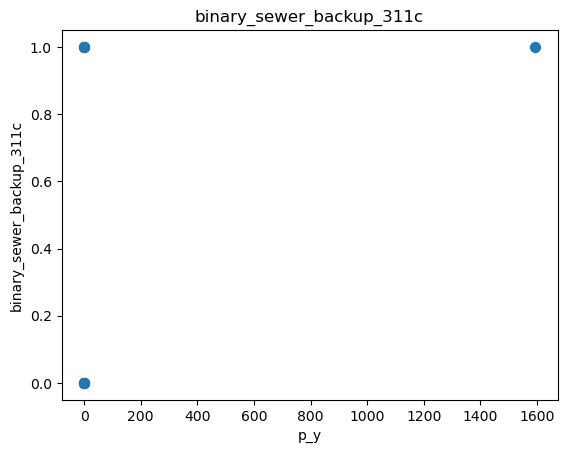

         Current function value: 0.000605
         Iterations: 35
         Current function value: 0.000000
         Iterations: 35


/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warni

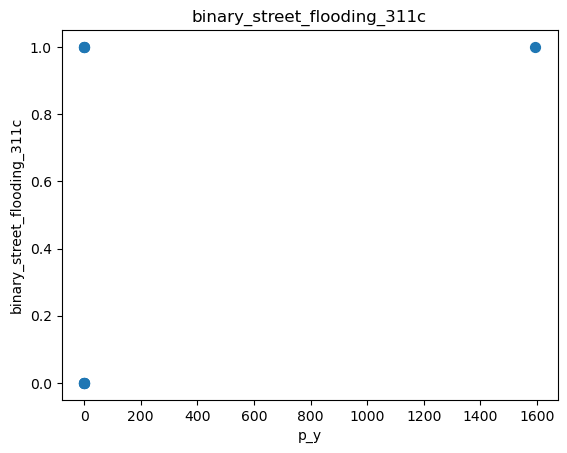

         Current function value: 0.000605
         Iterations: 35
         Current function value: 0.000000
         Iterations: 35


/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warni

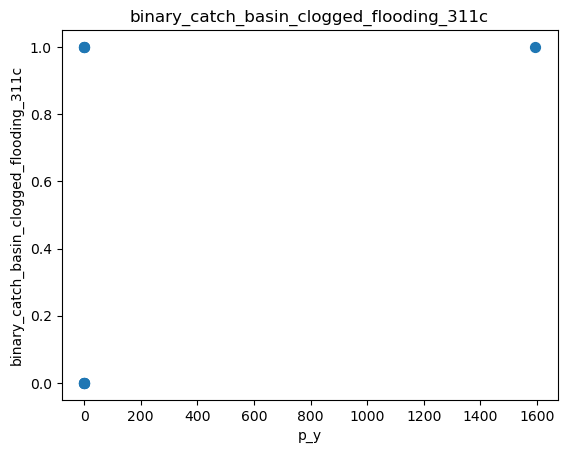

         Current function value: 0.000605
         Iterations: 35
         Current function value: 0.000000
         Iterations: 35


/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warni

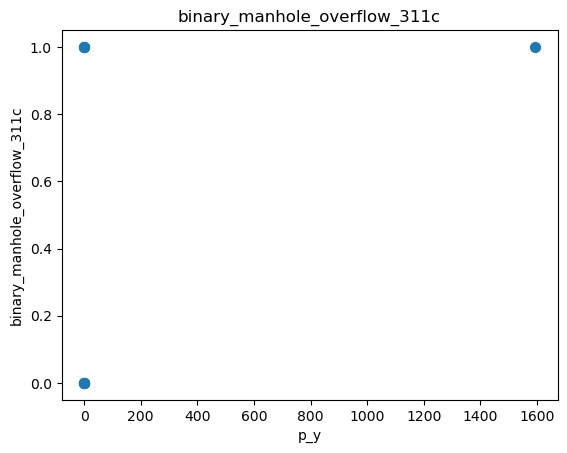

         Current function value: 0.000605
         Iterations: 35
         Current function value: 0.000000
         Iterations: 35


/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warni

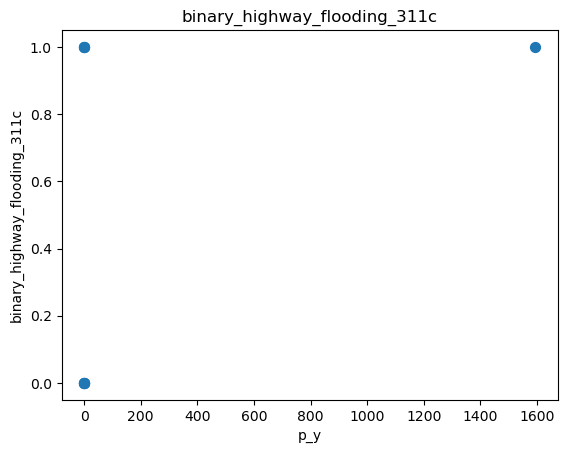

         Current function value: 0.000605
         Iterations: 35
         Current function value: 0.000000
         Iterations: 35


/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warni

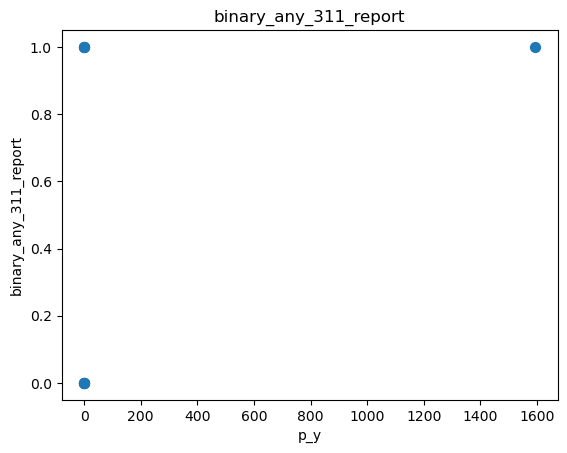

,binary_sewer_backup_311c I,binary_sewer_backup_311c II,binary_street_flooding_311c I,binary_street_flooding_311c II,binary_catch_basin_clogged_flooding_311c I,binary_catch_basin_clogged_flooding_311c II,binary_manhole_overflow_311c I,binary_manhole_overflow_311c II,binary_highway_flooding_311c I,binary_highway_flooding_311c II,binary_any_311_report I,binary_any_311_report II
Intercept,-21.6853,-199.4290,-21.6853,-199.4290,-21.6853,-199.4290,-21.6853,-199.4290,-21.6853,-199.4290,-21.6853,-199.4290
,(53.7637),(413797.5111),(53.7637),(413797.5111),(53.7637),(413797.5111),(53.7637),(413797.5111),(53.7637),(413797.5111),(53.7637),(413797.5111)
p_y,4406.6630,,4406.6630,,4406.6630,,4406.6630,,4406.6630,,4406.6630,
,(10528.5917),,(10528.5917),,(10528.5917),,(10528.5917),,(10528.5917),,(10528.5917),
p_y_percentile,,3.5474,,3.5474,,3.5474,,3.5474,,3.5474,,3.5474
,,(7402.2057),,(7402.2057),,(7402.2057),,(7402.2057),,(7402.2057),,(7402.2057)


In [38]:
all_311_models = []
d['any_311_report'] = False
for k in d.columns:
    if '311' in k:
        d['any_311_report'] = d['any_311_report'] | (d[k] > 0) 

for k in d.columns:
    if ('311' in k):
        col_name = ('binary_%s' % k).replace('/', '_')
        d[col_name] = (d[k] > 0) * 1.
        all_311_models.append(sm.Logit.from_formula('%s ~ p_y' % col_name, data = d).fit())
        all_311_models.append(sm.Logit.from_formula('%s ~ p_y_percentile' % col_name, data = d).fit())
        # plot probability of 311 report as function of p_y
        plt.figure()
        sns.regplot(data=d, x='p_y', y=col_name,  x_bins=20, fit_reg=False)
        plt.title(col_name)
        plt.show()
        del d[col_name]
    

summary_col(all_311_models, stars=True)

In [39]:
d['total_311'] = d[[k for k in d.columns if '311' in k]].sum(axis=1)
d['total_311'].describe()

count     8.0
unique    5.0
top       0.0
freq      4.0
Name: total_311, dtype: float64

### still, our model identifies lots of high-risk areas with no 311 reports!

In [40]:
for percentile in [80, 90, 95]:
    print("Fraction of locations at percentile %i or higher of p_y with no 311 report: %2.3f" % (percentile, 1 - d.loc[d['p_y_percentile'] >= percentile, 'any_311_report'].mean()))
    print("Population in these locations: %2.3f" % d.loc[(d['p_y_percentile'] >= percentile) & (d['any_311_report'] == 0), 'total_population'].sum())
print("fraction of locations with confirmed positive image with no 311 report: %2.3f" % (1 - d.loc[d['confirmed_flooded_image'], 'any_311_report'].mean()))
print("Population in these locations: %2.3f" % d.loc[(d['confirmed_flooded_image'] == 1) & (d['any_311_report'] == 0), 'total_population'].sum())
print("fraction of locations above 25th thres p_y among flooded images with no 311 report: %2.3f" % (1 - d.loc[d['above_thres'], 'any_311_report'].mean()))
print("Population in these locations: %2.3f" % d.loc[(d['above_thres'] == 1) & (d['any_311_report'] == 0), 'total_population'].sum())

Fraction of locations at percentile 80 or higher of p_y with no 311 report: 0.000
Population in these locations: 0.000
Fraction of locations at percentile 90 or higher of p_y with no 311 report: 0.000
Population in these locations: 0.000
Fraction of locations at percentile 95 or higher of p_y with no 311 report: 0.000
Population in these locations: 0.000
fraction of locations with confirmed positive image with no 311 report: 0.000
Population in these locations: 0.000
fraction of locations above 25th thres p_y among flooded images with no 311 report: 0.000
Population in these locations: 0.000


# flood risk areas

## TODO: currently I just implemented a pretty sketchy version of flood risk by setting dep_light_3_area > 0.

In [41]:
d['preliminary_measure_of_city_predicted_light_flood_risk'] = (d['dep_moderate_2_area'] > 0) * 1
d['frac_flooded_above_thres'] = d['dep_moderate_2_frac'] > 0.005
print("fraction of areas with light flood risk using this measure: %2.3f" % d['preliminary_measure_of_city_predicted_light_flood_risk'].mean())
print(sm.Logit.from_formula('preliminary_measure_of_city_predicted_light_flood_risk ~ p_y', data = d).fit().summary())
plt.figure()
sns.regplot(data=d, x='p_y', y='preliminary_measure_of_city_predicted_light_flood_risk',  x_bins=20, fit_reg=False)
plt.show()
    



fraction of areas with light flood risk using this measure: 0.625
         Current function value: inf
         Iterations: 35


/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: Singular matrix

In [42]:
d['preliminary_measure_of_city_predicted_moderate_flood_risk'] = (d['dep_moderate_2_area'] > 0) * 1
print("fraction of areas with moderate flood risk using this measure: %2.3f" % d['preliminary_measure_of_city_predicted_moderate_flood_risk'].mean())
print(sm.Logit.from_formula('preliminary_measure_of_city_predicted_moderate_flood_risk ~ p_y', data = d).fit().summary())
plt.figure()
sns.regplot(data=d, x='p_y', y='preliminary_measure_of_city_predicted_moderate_flood_risk',  x_bins=20, fit_reg=False)
plt.show()
    



fraction of areas with moderate flood risk using this measure: 0.625
         Current function value: inf
         Iterations: 35


/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: Singular matrix

# flood sensors

In [43]:
d['any_sensors'] = d['n_floodnet_sensors'] > 0
for percentile in [80, 90, 95]:
    print("Fraction of locations at percentile %i or higher of p_y with no sensors: %2.3f" % (percentile, 1 - d.loc[d['p_y_percentile'] >= percentile, 'any_sensors'].mean()))
    print("Population in these locations: %2.3f" % d.loc[(d['p_y_percentile'] >= percentile) & (d['any_sensors'] == 0), 'total_population'].sum())
print("fraction of locations with confirmed positive image with no sensors: %2.3f" % (1 - d.loc[d['confirmed_flooded_image'], 'any_sensors'].mean()))
print("Population in these locations: %2.3f" % d.loc[(d['confirmed_flooded_image'] == 1) & (d['any_sensors'] == 0), 'total_population'].sum())
print("fraction of locations above 25th thres p_y among flooded images with no sensors: %2.3f" % (1 - d.loc[d['above_thres'], 'any_sensors'].mean()))
print("Population in these locations: %2.3f" % d.loc[(d['above_thres']) & (d['any_sensors'] == 0), 'total_population'].sum())

Fraction of locations at percentile 80 or higher of p_y with no sensors: 0.000
Population in these locations: 0.000
Fraction of locations at percentile 90 or higher of p_y with no sensors: 0.000
Population in these locations: 0.000
Fraction of locations at percentile 95 or higher of p_y with no sensors: 0.000
Population in these locations: 0.000
fraction of locations with confirmed positive image with no sensors: 0.000
Population in these locations: 0.000
fraction of locations above 25th thres p_y among flooded images with no sensors: 0.000
Population in these locations: 0.000


[0.00395438 0.00482233 0.00569028 0.00655824 0.00742619 0.00829414
 0.00916209 0.01003004 0.010898   0.01176595 0.0126339  0.01350185
 0.0143698  0.01523776 0.01610571 0.01697366 0.01784161 0.01870956
 0.01957752 0.02044547 0.02131342 0.02218137 0.02304932 0.02391728
 0.02478523 0.02565318 0.02652113 0.02738908 0.02825704 0.02912499
 0.02999294 0.03086089 0.03172884 0.0325968  0.03346475 0.0343327
 0.03520065 0.0360686  0.03693656 0.03780451 0.03867246 0.03954041
 0.04040836 0.04127632 0.04214427 0.04301222 0.04388017 0.04474812
 0.04561608 0.04648403 0.04735198 0.04821993 0.04908788 0.04995584
 0.05082379 0.05169174 0.05255969 0.05342764 0.0542956  0.05516355
 0.0560315  0.05689945 0.0577674  0.05863536 0.05950331 0.06037126
 0.06123921 0.06210716 0.06297512 0.06384307 0.06471102 0.06557897
 0.06644692 0.06731488 0.06818283 0.06905078 0.06991873 0.07078668
 0.07165463 0.07252259 0.07339054 0.07425849 0.07512644 0.07599439
 0.07686235 0.0777303  0.07859825 0.0794662  0.08033415 0.08120

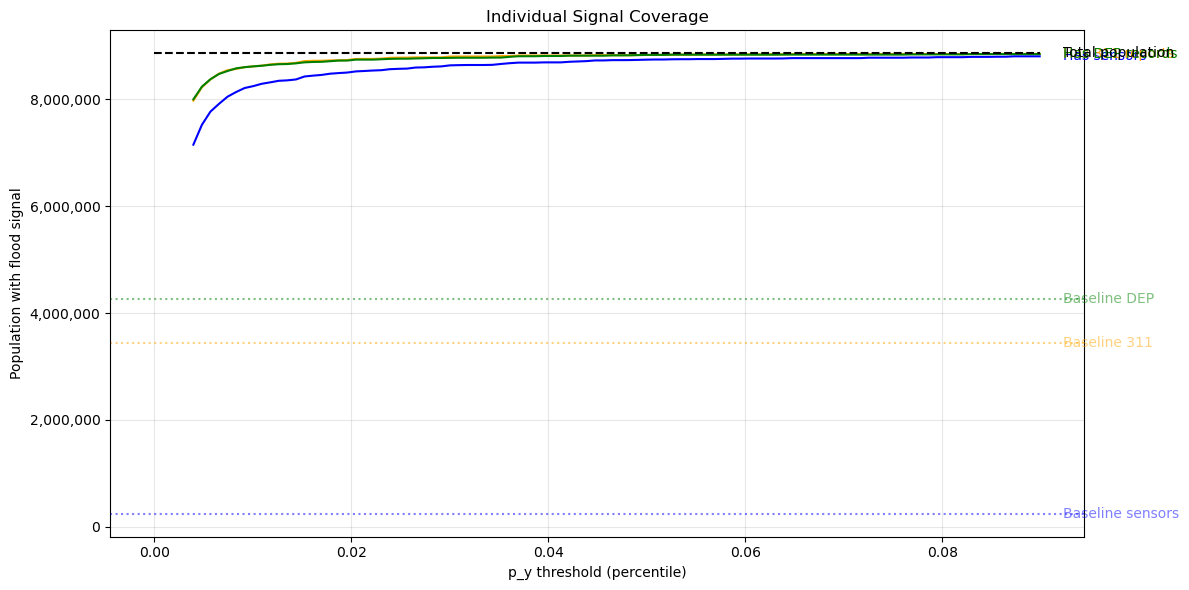

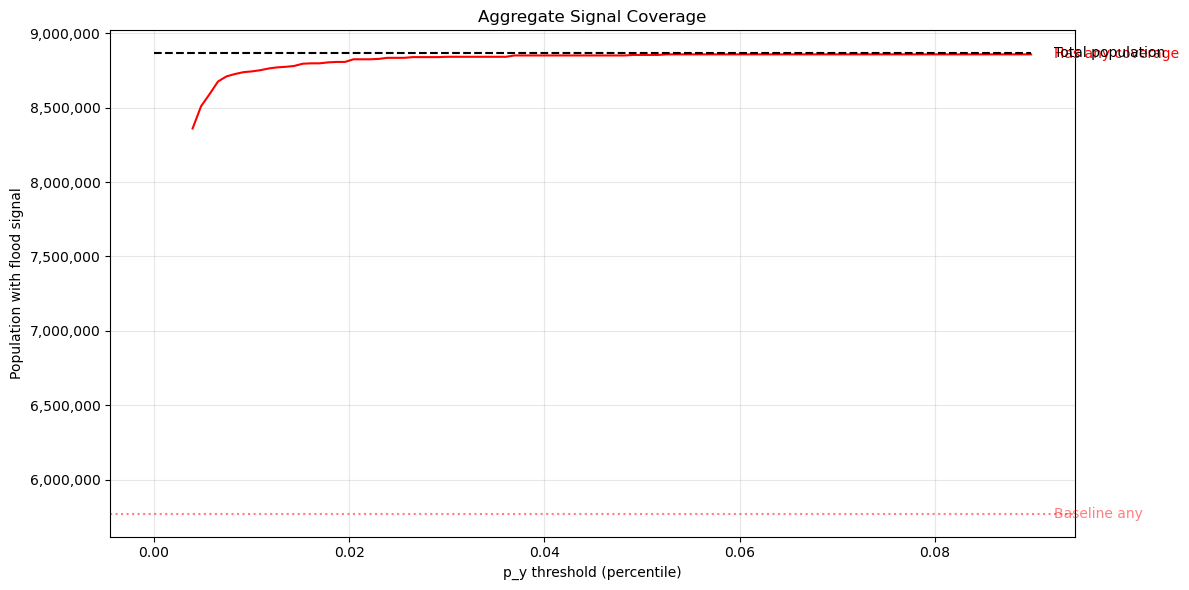

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Create thresholds array
thresholds = np.linspace(d.loc[d['confirmed_flooded_image'], 'p_y'].quantile(0.10), d.loc[d['confirmed_flooded_image'], 'p_y'].quantile(0.90), 100)
print(thresholds)

# Create binary indicators
d['no_311'] = d['total_311'] == 0
d['no_dep'] = d['dep_moderate_2_area'] == 0
d['no_sensors'] = d['n_floodnet_sensors'] == 0
d['no_sensors_311_dep'] = d['no_311'] & d['no_dep'] & d['no_sensors']
d['any_external'] = ~d['no_sensors_311_dep']

# Calculate baseline populations
baseline_sensors = d.loc[~d['no_sensors'], 'total_population'].sum()
baseline_311 = d.loc[~d['no_311'], 'total_population'].sum()
baseline_dep = d.loc[~d['no_dep'], 'total_population'].sum()
baseline_any = d.loc[~d['any_external'].eq(0), 'total_population'].sum()
total_pop = d['total_population'].sum()

# Initialize arrays for populations
sensors_pop = []
has_311_pop = []
has_dep_pop = []
has_any_coverage_pop = []

# Calculate populations with coverage at each threshold
for threshold in thresholds:
    flood_mask = d['p_y'] <= threshold
    
    sensors_pop.append(d.loc[flood_mask | d['no_sensors'].eq(0), 'total_population'].sum())
    has_311_pop.append(d.loc[flood_mask | d['no_311'].eq(0), 'total_population'].sum())
    has_dep_pop.append(d.loc[flood_mask |  d['no_dep'].eq(0), 'total_population'].sum())
    has_any_coverage_pop.append(d.loc[flood_mask | d['any_external'].eq(1), 'total_population'].sum())

# Plot 1: Individual signals
fig1, ax1 = plt.subplots(figsize=(12, 6))

ax1.axhline(y=baseline_sensors, color='blue', linestyle=':', alpha=0.5)
ax1.axhline(y=baseline_311, color='orange', linestyle=':', alpha=0.5)
ax1.axhline(y=baseline_dep, color='green', linestyle=':', alpha=0.5)

sensors_line, = ax1.plot(thresholds, sensors_pop, color='blue')
has_311_line, = ax1.plot(thresholds, has_311_pop, color='orange')
has_dep_line, = ax1.plot(thresholds, has_dep_pop, color='green')
total_pop_line, = ax1.plot([0, max(thresholds)], [total_pop, total_pop], 
                          linestyle='--', color='black')

# Add labels for first plot
last_x = thresholds[-1]
legend_offset = ax1.get_xlim()[1] * 0.025
ax1.text(last_x + legend_offset, sensors_pop[-1], 'Has sensors', 
         color='blue', verticalalignment='center')
ax1.text(last_x + legend_offset, has_311_pop[-1], 'Has 311 reports', 
         color='orange', verticalalignment='center')
ax1.text(last_x + legend_offset, has_dep_pop[-1], 'Has DEP records', 
         color='green', verticalalignment='center')
ax1.text(last_x + legend_offset, total_pop, 'Total population', 
         color='black', verticalalignment='center')

# Add baseline labels for first plot
ax1.text(last_x + legend_offset, baseline_sensors, 'Baseline sensors', 
         color='blue', alpha=0.5, verticalalignment='center')
ax1.text(last_x + legend_offset, baseline_311, 'Baseline 311', 
         color='orange', alpha=0.5, verticalalignment='center')
ax1.text(last_x + legend_offset, baseline_dep, 'Baseline DEP', 
         color='green', alpha=0.5, verticalalignment='center')

ax1.set_xlabel('p_y threshold (percentile)')
ax1.set_ylabel('Population with flood signal')
ax1.grid(True, alpha=0.3)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
#ax1.set_xlim(0, 105)
ax1.set_title('Individual Signal Coverage')

plt.tight_layout()

# Plot 2: Any external coverage (new figure)
fig2, ax2 = plt.subplots(figsize=(12, 6))

ax2.axhline(y=baseline_any, color='red', linestyle=':', alpha=0.5)
has_any_line, = ax2.plot(thresholds, has_any_coverage_pop, color='red')
total_pop_line2, = ax2.plot([0, max(thresholds)], [total_pop, total_pop], 
                           linestyle='--', color='black')

# Add labels for second plot
ax2.text(last_x + legend_offset, has_any_coverage_pop[-1], 'Has any coverage', 
         color='red', verticalalignment='center')
ax2.text(last_x + legend_offset, total_pop, 'Total population', 
         color='black', verticalalignment='center')
ax2.text(last_x + legend_offset, baseline_any, 'Baseline any', 
         color='red', alpha=0.5, verticalalignment='center')

ax2.set_xlabel('p_y threshold (percentile)')
ax2.set_ylabel('Population with flood signal')
ax2.grid(True, alpha=0.3)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
#ax2.set_xlim(0, 105)
ax2.set_title('Aggregate Signal Coverage')

plt.tight_layout()
plt.show()

In [36]:
# sum of population in tracts with any coverage 
print(d.loc[d['any_external'].eq(1), 'total_population'].sum())

5773210
